# 18장. 시퀀스 배열로 다루는 순환신경망(RNN)

In [6]:
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils

In [13]:
#seed값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

#불러온 데이터를 학습셋, 데이터셋으로 나누기
(X_train, Y_train), (X_test, Y_test)=reuters.load_data(num_words=1000,test_split=0.2)
#20%를 테스트로 쓰겠습니다.
#모든단어 쓰기 힘드니 1-1000에 해당하는 빈도 높은 단어만 쓰겠다(num_words)

#데이터확인하기
category = numpy.max(Y_train) +1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

#데이터 전처리
#단어수 100개로 맞춰 나머지는 패딩으로 채움
#만일 입력된 기사의 단어수가 100보다 크면 100개째 단어만 선택하고 나머지는 버림
#100에서 몾랄때는 모자라는 부분을 0으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=100) 
X_test = sequence.pad_sequences(X_test, maxlen=100)
print(X_test)

#y데이터 원핫인코딩 처리를 하여 데이터 전처리 과정을 마침(0과1로)
# 46개니깐 바꾸는구나
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print(Y_test)

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[[  5   2   7 ... 510  17  12]
 [652 194   2 ... 760  17  12]
 [ 13  10 139 ...   8  17  12]
 ...
 [  0   0   0 ...  11  17  12]
 [  0   0   0 ...   8  17  12]
 [ 47 758  15 ...   2  17  12]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
#모델의 설정
model = Sequential()
model.add(Embedding(1000,100))#단어사이의 유사도
#1000:불러온 단어의 총갯수, 100:기사당 단어수(MAX)
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46,activation = 'softmax'))

#모델의 컴파일
model.compile(loss = 'categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=100, epochs=20,
                   validation_data=(X_test, Y_test))

print("\n Test Accuracy:%.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/20
90/90 [==============================] - 10s 102ms/step - loss: 2.5897 - accuracy: 0.3515 - val_loss: 2.1629 - val_accuracy: 0.4786
Epoch 2/20
90/90 [==============================] - 9s 102ms/step - loss: 2.0068 - accuracy: 0.4836 - val_loss: 1.8766 - val_accuracy: 0.5178
Epoch 3/20
90/90 [==============================] - 10s 116ms/step - loss: 1.8129 - accuracy: 0.5303 - val_loss: 1.7703 - val_accuracy: 0.5454
Epoch 4/20
90/90 [==============================] - 10s 116ms/step - loss: 1.7088 - accuracy: 0.5541 - val_loss: 1.7217 - val_accuracy: 0.5574
Epoch 5/20
90/90 [==============================] - 10s 116ms/step - loss: 1.6533 - accuracy: 0.5749 - val_loss: 1.7423 - val_accuracy: 0.5516
Epoch 6/20
90/90 [==============================] - 11s 119ms/step - loss: 1.5963 - accuracy: 0.5872 - val_loss: 1.6300 - val_accuracy: 0.5837
Epoch 7/20
90/90 [==============================] - 11s 126ms/step - loss: 1.5141 - accuracy: 0.6052 - val_loss: 1.5886 - val_accuracy: 0.5975


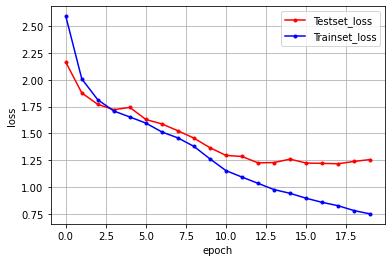

In [21]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

#그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

#그래프에 그리드를 추가하고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

* trainset은 돌리면 돌릴수록 오차가 줄어드는데, testset은 다시 올라가서 내려갈때쯤 멈춰줘야 할거 같다.

## LSTM과 CNN 조합을 이용한 영화리뷰 분류하기

* 영화와 관련된 정보와 출연진 정보, 개봉 정보, 영화후기, 평점에 이르기 까지 매우 폭넓은 데이터가 저장된 자료임
* 데이터셋에서 나타나는 빈도에 따라 번호가 정해지므로 빈도가 높은 데이터를 불러와 학습시킬수 있음
* 참조 :https://excelsior-cjh.tistory.com/180


17473536/17464789 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 55)                26400     
                                                                 
 dense_2 (Dense)             (None, 1)                 

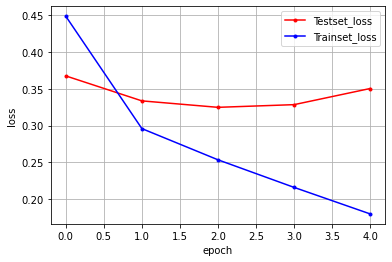

In [22]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
